In [1]:
import numpy as np
np.random.seed(123)
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, Embedding, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from IPython.display import clear_output

Using TensorFlow backend.


(50000, 32, 32, 3)
(10000, 1)


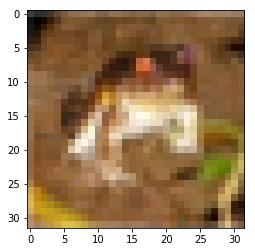

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_test.shape)
plt.imshow(x_train[0])

In [3]:
num_classes = 10
batch_size = 32
epochs = 20
num_predictions = 20

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape)

(50000, 10)


In [6]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

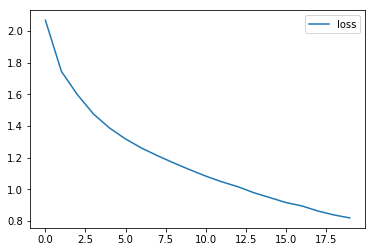

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),shuffle=True, callbacks=[plot_losses])

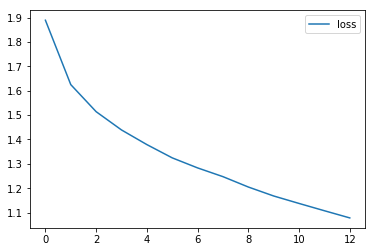

Epoch 14/20
 5248/50000 [==>...........................] - ETA: 5s - loss: 1.0389 - acc: 0.6311

In [ ]:
#try another optimization method
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test),shuffle=True, callbacks=[plot_losses])

In [ ]:
scores = model.evaluate(x_test, y_test)
print("Loss:", scores[0])
print("Accuracy", scores[1])

In [ ]:
y_predict = model.predict(x_test)

from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_predict,y_test)
print("Confusion matrix")
print(m)